In [30]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
import imblearn 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('.\heart_2020_cleaned.csv')


In [32]:
#print(df.duplicated().sum())
#print(df.drop_duplicates(inplace=True))

In [33]:
replace_map = {'HeartDisease':{'Yes':1,'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Smoking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'AlcoholDrinking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Stroke':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'DiffWalking':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'Sex':{'Female':1, 'Male':0}}
df.replace(replace_map,inplace=True)

replace_map = {'AgeCategory':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}
df.replace(replace_map,inplace=True)

#Is white || is black || is Asian ||is American Indian/Alaskan Native || is Hispanic || is Other
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df=pd.DataFrame(encoder.fit_transform(df[['Race','Diabetic']]).toarray())
encoder_df.columns=['Race0','Race1','Race2','Race3','Race4','Race5','NotDiabetic','Diabetic during pregnancy','Borderline diabetes','IsDiabetic']
df=df.join(encoder_df)


df['BMI']=pd.cut(x=df['BMI'],bins=[0,18.5,24.9,29.9,34.9,100],labels=['0','1','2','3','4'])
replace_map = {'BMI':{'0':0, '1':1,'2':2,'3':3,'4':4}}
df.replace(replace_map,inplace=True)

df['SleepTime']=pd.cut(x=df['SleepTime'],bins=[-1,4,6,8,10,12,14,24],labels=['0','1','2','3','4','5','6'])
replace_map = {'SleepTime':{'0':0, '1':1,'2':2,'3':3,'4':4,'5':5,'6':6}}
df.replace(replace_map,inplace=True)

df['PhysicalHealth']=pd.cut(x=df['PhysicalHealth'],bins=[-1,5,10,15,20,25,35],labels=['0','1','2','3','4','5'])
replace_map = {'PhysicalHealth':{'0':0, '1':1,'2':2,'3':3,'4':4,'5':5}}
df.replace(replace_map,inplace=True)

df['MentalHealth']=pd.cut(x=df['MentalHealth'],bins=[-1,5,10,15,20,25,35],labels=['0','1','2','3','4','5'])
replace_map = {'MentalHealth':{'0':0,'1':1,'2':2,'3':3,'4':4,'5':5}}
df.replace(replace_map,inplace=True)


replace_map = {'PhysicalActivity':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'GenHealth':{'Poor':0, 'Fair':1,'Good':2,'Very good':3,'Excellent':4}}
df.replace(replace_map,inplace=True)

replace_map = {'Asthma':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'KidneyDisease':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)

replace_map = {'SkinCancer':{'Yes':1, 'No':0}}
df.replace(replace_map,inplace=True)




df=df.drop(['Race','Diabetic'],axis=1)

scaler_df= MinMaxScaler(feature_range=(0,1)).fit(df)
df= pd.DataFrame(scaler_df.transform(df[df.columns]),columns=df.columns)
df.columns



Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race0', 'Race1', 'Race2', 'Race3', 'Race4', 'Race5',
       'NotDiabetic', 'Diabetic during pregnancy', 'Borderline diabetes',
       'IsDiabetic'],
      dtype='object')

# Correlation matrix

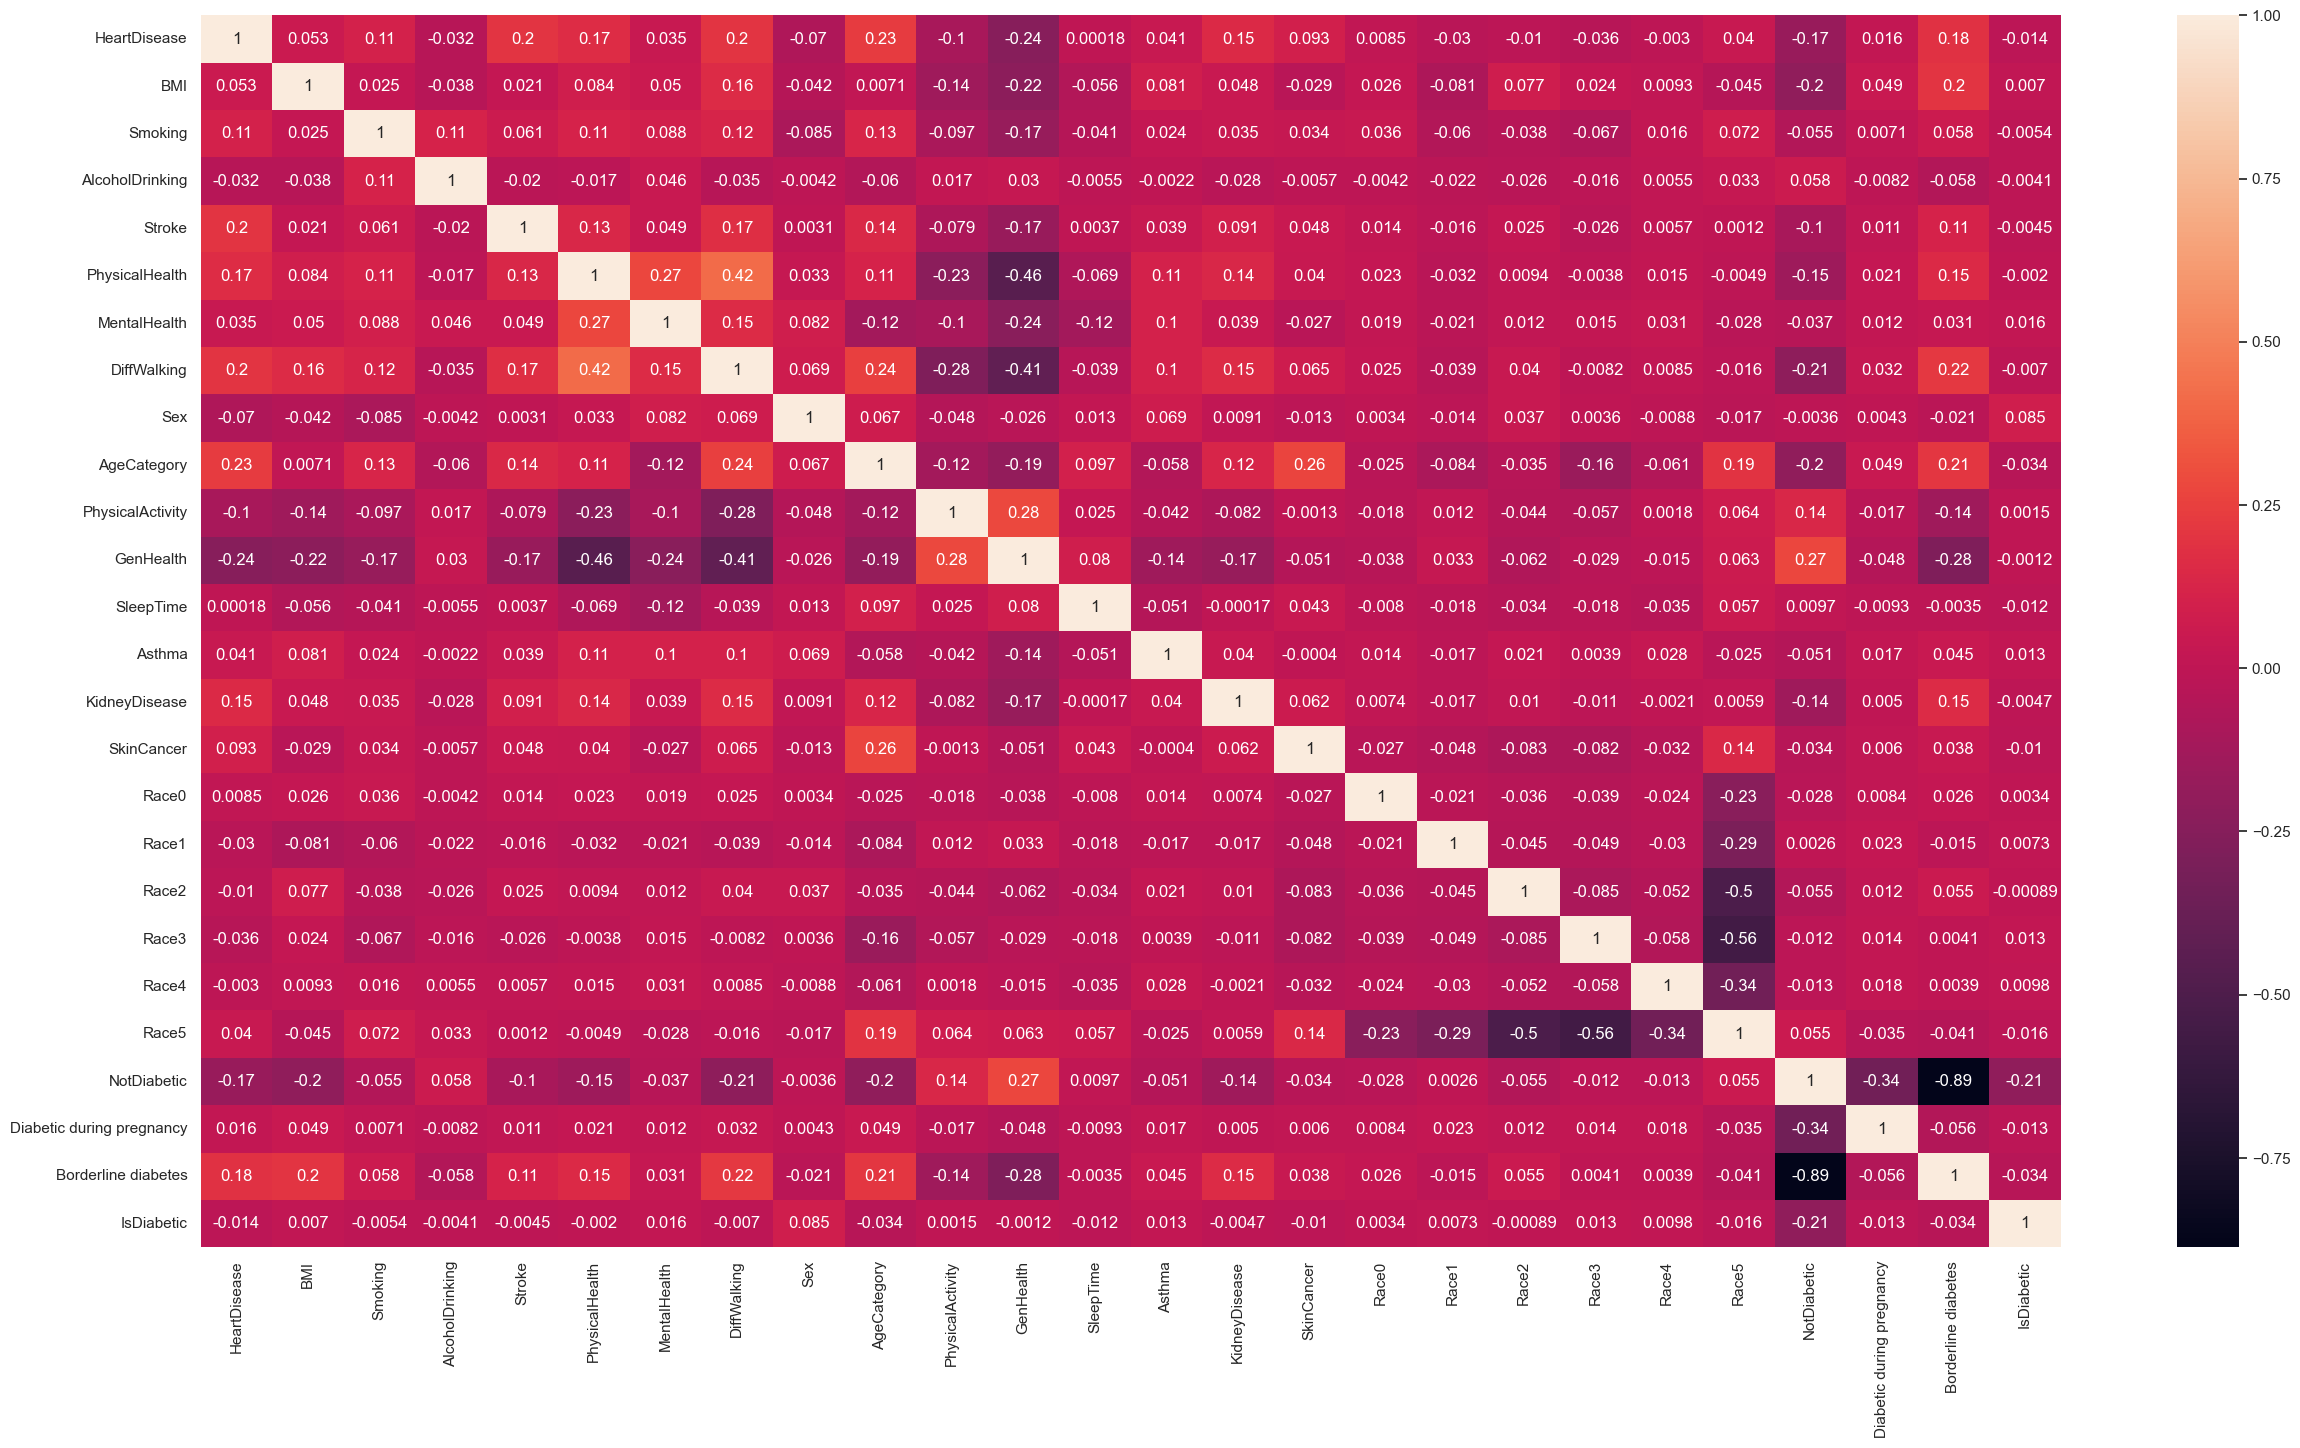

In [34]:
matrix = df.corr()
sns.set(rc={'figure.figsize':(30,16)})
sns.heatmap(matrix,annot=True)
plt.show()

In [35]:
df=df.drop(labels=['SleepTime','Asthma','SkinCancer','Race0','Race1','Race2','Race3','Race4','Race5','Sex','MentalHealth'],axis=1)

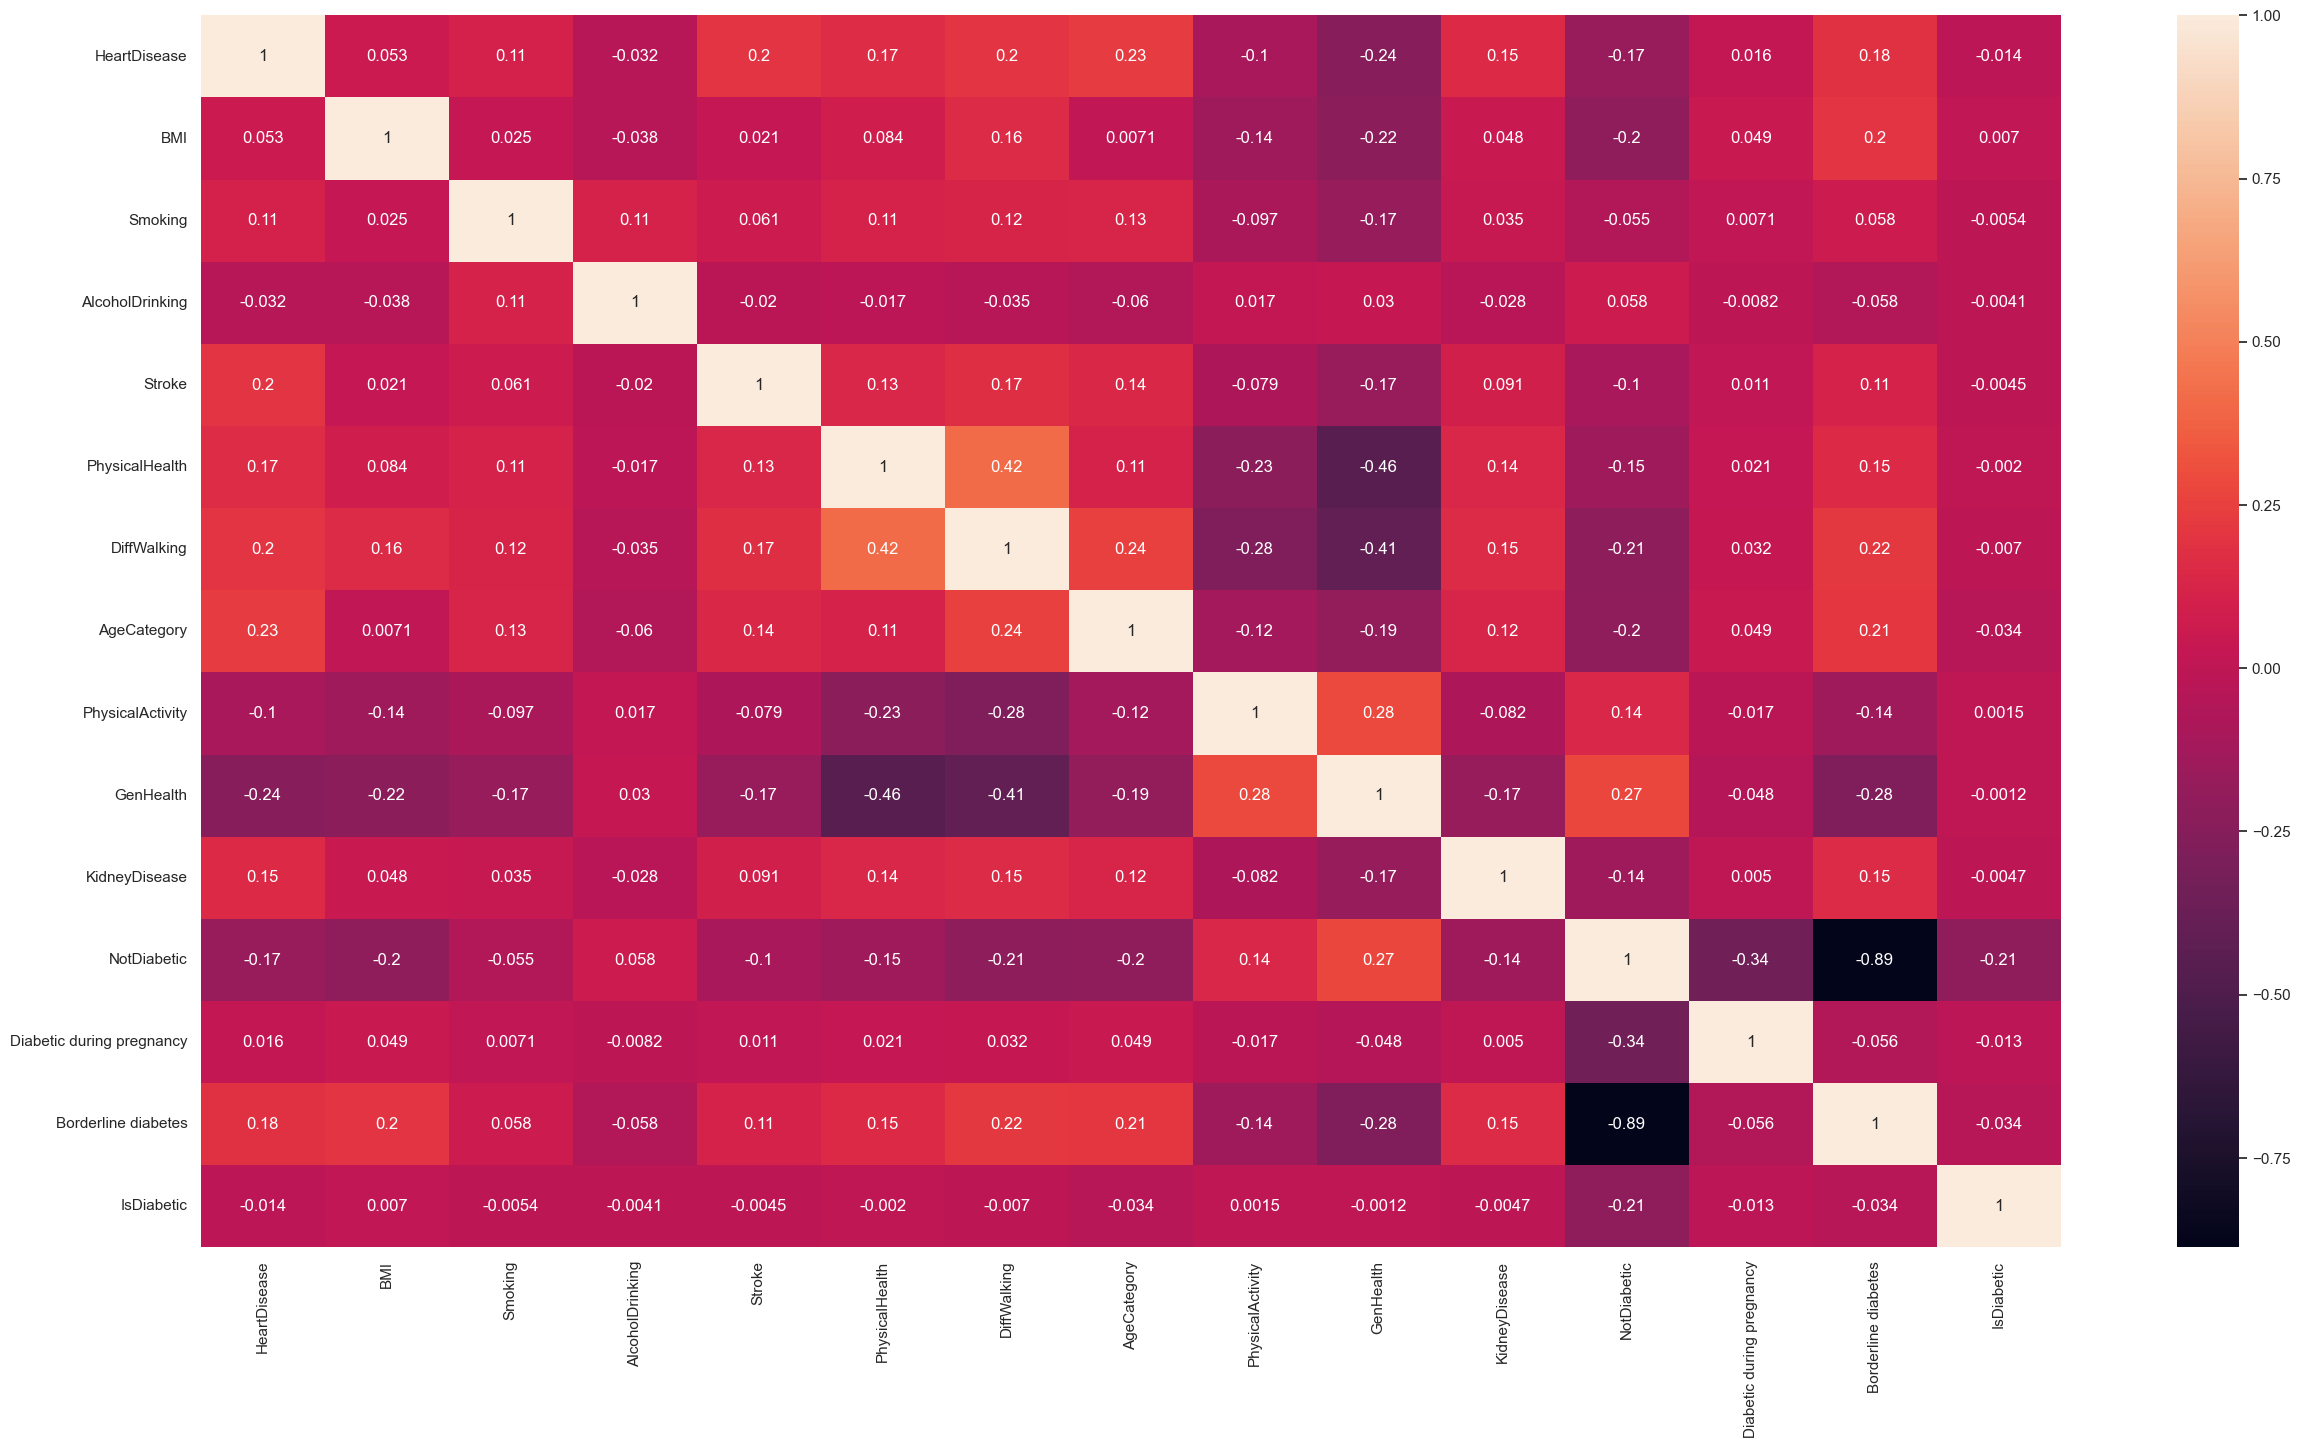

In [36]:
matrix = df.corr()
sns.set(rc={'figure.figsize':(30,16)})
sns.heatmap(matrix,annot=True)
plt.show()

In [37]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=13122001)

# SMOTE

In [38]:
'''
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_train.drop('HeartDisease', axis=1), df_train['HeartDisease'])
df_train = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
print(df_train['HeartDisease'].value_counts())
df_train'''

"\n# Resampling the minority class. The strategy can be changed as required.\nsm = SMOTE(sampling_strategy='minority', random_state=42)\n# Fit the model to generate the data.\noversampled_X, oversampled_Y = sm.fit_resample(df_train.drop('HeartDisease', axis=1), df_train['HeartDisease'])\ndf_train = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)\nprint(df_train['HeartDisease'].value_counts())\ndf_train"

In [39]:

#create two different dataframe of majority and minority class
df_majority = df_train[(df['HeartDisease']==0)]
df_minority = df_train[(df['HeartDisease']==1)]
#upsample minority class
df_minority_upsampled = resample(df_minority,
                               replace=True,
                               n_samples=50000,
                               random_state=13122001)
#combine majority class with upsampled minority class
df_train=pd.concat([df_minority_upsampled,df_majority])
df_train

c:\Users\Utilizador\anaconda3\envs\env3.7\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\Utilizador\anaconda3\envs\env3.7\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,KidneyDisease,NotDiabetic,Diabetic during pregnancy,Borderline diabetes,IsDiabetic
215441,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.916667,1.0,0.50,0.0,1.0,0.0,0.0,0.0
152592,1.0,1.00,0.0,0.0,0.0,0.0,1.0,0.750000,1.0,0.50,0.0,1.0,0.0,0.0,0.0
157324,1.0,0.75,1.0,0.0,1.0,0.4,0.0,0.416667,1.0,0.25,0.0,1.0,0.0,0.0,0.0
258989,1.0,0.25,0.0,0.0,0.0,0.4,1.0,0.416667,1.0,0.25,0.0,1.0,0.0,0.0,0.0
289127,1.0,0.75,1.0,0.0,0.0,0.2,0.0,0.750000,1.0,0.50,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45404,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.25,0.0,1.0,0.0,0.0,0.0
7346,0.0,0.75,1.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.75,0.0,1.0,0.0,0.0,0.0
196849,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.833333,0.0,0.50,0.0,0.0,0.0,1.0,0.0
86510,0.0,1.00,0.0,0.0,0.0,0.2,0.0,0.333333,1.0,0.75,0.0,1.0,0.0,0.0,0.0


In [42]:
X_train=df_train.drop(['HeartDisease'],axis=1)
y_train=df_train['HeartDisease'].to_frame()
X_test=df_test.drop(['HeartDisease'],axis=1)
y_test=df_test['HeartDisease'].to_frame()
X_train.to_csv('.\X_train.csv',index=False)
y_train.to_csv('.\y_train.csv',index=False)
X_test.to_csv('.\X_test.csv',index=False)
y_test.to_csv('.\y_test.csv',index=False)
df.to_csv('.\df.csv',index=False)

In [41]:
print(df_test['HeartDisease'].value_counts())

0.0    87823
1.0     8116
Name: HeartDisease, dtype: int64
